<a href="https://colab.research.google.com/github/prasannaChristodoss/MLLectures/blob/main/irisknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets as Datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
iris = Datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
display(pd.concat([irisdf.head(), irisdf.tail()]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [41]:
X = irisdf.drop('target', axis=1)
y = irisdf['target']
X.shape, y.shape

((150, 4), (150,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
X_test.shape, y_test.shape

((60, 4), (60,))

In [35]:
knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [36]:
predictions = knn1.predict(X_test)

In [37]:
print(accuracy_score(y_test, predictions))

0.9833333333333333


In [38]:
cm = confusion_matrix(y_test, predictions)
cm

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 17]])

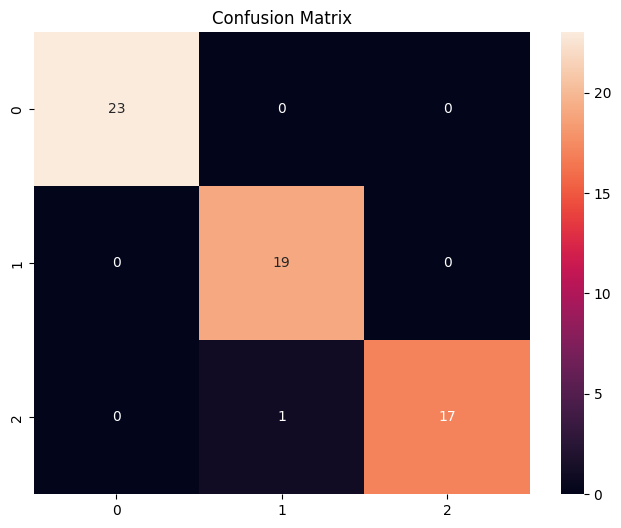

In [13]:
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)
plt.show()

In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



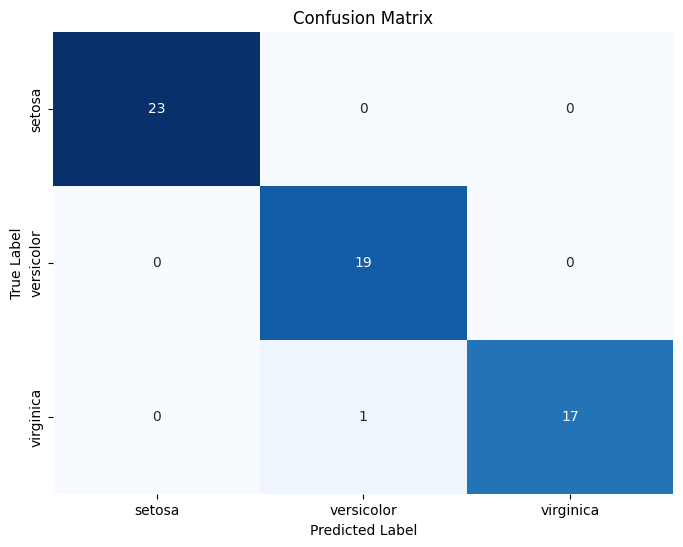

In [15]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [44]:
pred1 = knn1.predict([[5, 5, 5, 5]])
#pred1
print(iris.target_names[pred1])

['virginica']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
